# Анализ А/В-теста. Проектная работа

_____
**Описание работы.**

Получен список гипотез для увеличения выручки.

**Задача:** приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

1. [Знакомство с данными](#start)
2. [Приоритизация гипотез](#hyp)
3. [Анализ А/В-теста](#test)
   * [Задача 1](#1)
   * [Задача 2](#2)
   * [Задача 3](#3)
   * [Задача 4](#4)
   * [Задача 5](#5)
   * [Задача 6](#6)
   * [Задача 7](#7)
   * [Задача 8](#8)
   * [Задача 9](#9)
   * [Задача 10](#10)
   * [Задача 11](#11)
   * [Задача 12](#12)
   * [Задача 13](#13)
    
    
4. [Принятие решений по результатам теста. Выводы](#end)
        

### Знакомство с данными <a id="start"></a>

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

Сохраним файлы в переменные

In [2]:
thesis = pd.read_csv('hypothesis.csv')

In [3]:
orders = pd.read_csv('orders.csv')

In [4]:
visitors = pd.read_csv('visitors.csv')

Выведем первые 5 строк и инфформацио о каждой таблице

**Данные для первой части**

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами:

* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [5]:
thesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [6]:
thesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Напишем функцию для поиска явных дубликатов и пропусков

In [7]:
def gen(df):
    print('-Пропуски-')
    count=0
    for element in df.columns:
        if df[element].isna().sum() > 0:
            print(element, '-', df[element].isna().sum(), 'пропусков')
            count=+1
    if count ==0:
        print('Пропусков нет')
    print('')
    print('-Дубликаты-')
    if df.duplicated().sum() > 0:

        print('Дубликатов', df.duplicated().sum())
    else:
        print('Дубликатов нет')

In [8]:
gen(thesis)

-Пропуски-
Пропусков нет

-Дубликаты-
Дубликатов нет


Д убликатов и пропусков нет. Приведем назвавния столбцов к нижнему регистру

In [9]:
thesis.columns = thesis.columns.str.lower()

**Данные для второй части**
 - **Файл orders.csv**
   * `transactionId` — идентификатор заказа
   * `visitorId` — идентификатор пользователя, совершившего заказ
   * `date` — дата, когда был совершён заказ
   * `revenue` — выручка заказа
   * `group` — группа A/B-теста, в которую попал заказ.orders.head()

- **Файл visitors.csv**
   * `date` — дата
   * `group` — группа A/B-теста
   * `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
gen(orders)

-Пропуски-
Пропусков нет

-Дубликаты-
Дубликатов нет


In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
gen(visitors)

-Пропуски-
Пропусков нет

-Дубликаты-
Дубликатов нет


В остальных таблицах также нет пропусков и дубликатов.

Ознакомимся подробнее с данными таблицы orders. Посмотрим, сколько групп и участников в них, не попали ли пользователи одной группы в другую, ознакомимся с датами начала и окончания теста.

In [16]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

Всего 2 группы - А и В, в  группе В количество участников больше

In [17]:
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

58 участников попадает в одни и те же группы.

Создадим срез таблицы с этими пользователями и их заказами, и посмотрим на ее размер.

In [18]:
bad_users = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitorId'].unique()
orders_new = orders.query('visitorId in @bad_users')

In [19]:
orders_new.shape

(181, 5)

Если удалить срез с этими пользователями, таблица потреряет 181 строку из 1197, это довольно много, нужно сначала провести тестирование с этими пользователями, и без них, чтобы оценить их влияние на результаты.

Ознакомимся с датами проведения тестирования:

In [24]:
orders['date'].min()

'2019-08-01'

In [25]:
orders['date'].max()

'2019-08-31'

Тест проводился в течение месяца - с 1 по 31 августа 2019 года.

### Приоритизация гипотез. <a id="hyp"></a>

#### **Задача**
* Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE.

In [26]:
thesis['ICE'] = (thesis['impact'] * thesis['confidence'] ) /thesis['efforts']
thesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False).round(2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


Наиболее перспективные гипотезы по ICE - 8, 0, 7.
Применим фреймворк RICE:

In [27]:
thesis['RICE'] = (thesis['reach'] * thesis['impact'] * thesis['confidence'] ) /thesis['efforts']
thesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Теперь наиболее перспективными гипотезами остались номера 7 и 2, а 0 на третьем месте. Самые неприоритетные - 4, 3, 5, 1.

Построим тепловую карту, чтобы оценить распределение компонентов `'reach'`,`'impact'`,`'confidence'` и `'efforts'`:

In [28]:
teal = sns.light_palette('#495C83', reverse=True, as_cmap=True)
thesis[['hypothesis','reach','impact','confidence','efforts']].style.background_gradient(cmap=teal)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


По значению reach лидирует 7 гипотеза, по impact - 0 и по efforts - 1
у 8 гипотезы очень низкий показатель reach , а у 2 - целых 2 компонента ниже 5 баллов - impact и efforts
RICE в отличие от ICE, также включает параметр reach, что влияет на конечный результат, поэтому рекомендуется считать гипотезы 2 и 7  и использования метода RICE наиболее приоритетными.

### Анализ A/B-теста<a id="test"></a>

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача:
Проанализировать A/B-тест.

#### Построить график кумулятивной выручки по группам.<a id="1"></a>

Приведем даты в нужный формат

In [29]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Соберём агрегированные кумулятивные по дням данные о заказах:

In [30]:
datesGroups = orders[['date', 'group']].drop_duplicates() # создаем массив уникальных пар значений дат и групп теста

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg({'date':'max',
            'group':'max',
            'transactionId':'nunique',
            'visitorId':'nunique',
            'revenue':'sum',}),axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и переименовываем столбцы
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

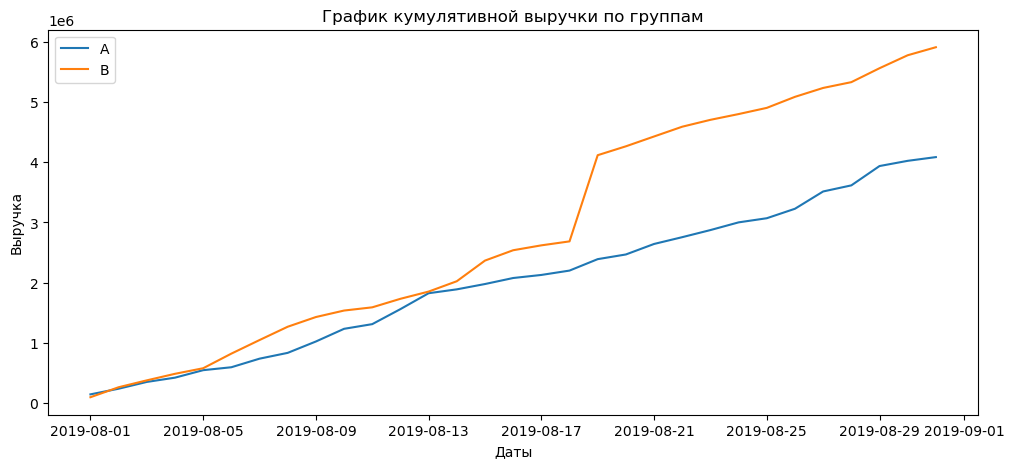

In [31]:
# датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А и В
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

#строим графики с выручкой
plt.figure(figsize=(12, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Даты')
plt.ylabel('Выручка')
plt.legend();

Кумулятивная выручка группы В выше выручки группы А.
13 августа они сравнялись, но в 17-21 числах у выручки группы В случился резкий скачок.

#### Построить график кумулятивного среднего чека по группам.<a id="2"></a>

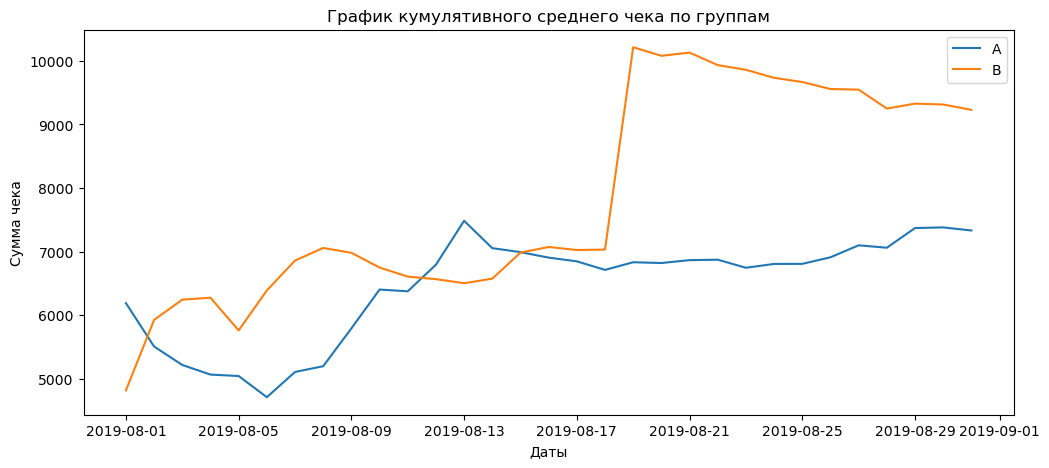

In [32]:
#построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(12, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Даты')
plt.ylabel('Сумма чека')
plt.legend();

Сумма среднего чека группы В в целом превышает показатели группы А, и также как и на графике выше, резко увеличилась в конце августа. Вероятно, в эти дни в этой группе кто-то сделал крупный заказ.

#### Построить график относительного изменения кумулятивного среднего чека группы B к группе A.<a id="3"></a>

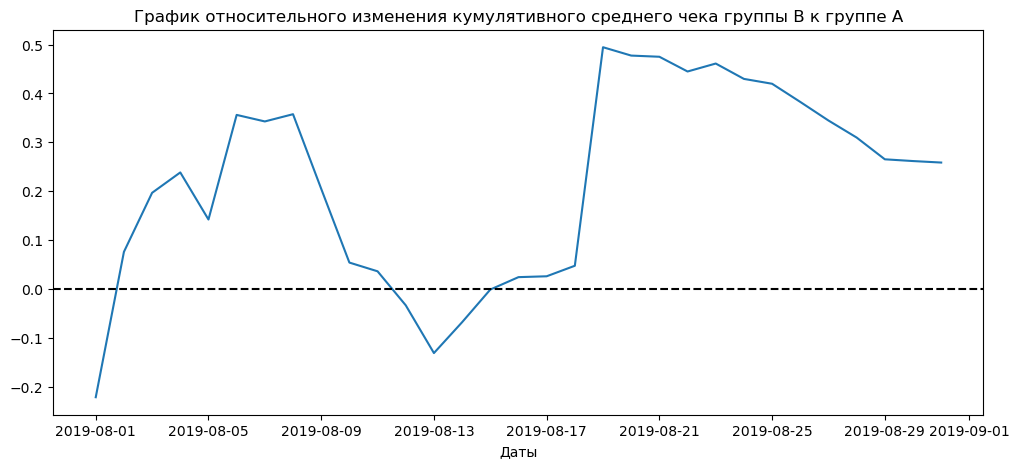

In [33]:
# собираем данные в один датафрейм
mergedCumulativeRevenue = cumulativeRevenueA\
.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/\
                                           mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']\
                                                                                /mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Даты');

Показания среднего чека колеблются и имеют выбросы в начале и конце месяца.

#### Построить график кумулятивного среднего количества заказов на посетителя по группам. <a id="4"></a>

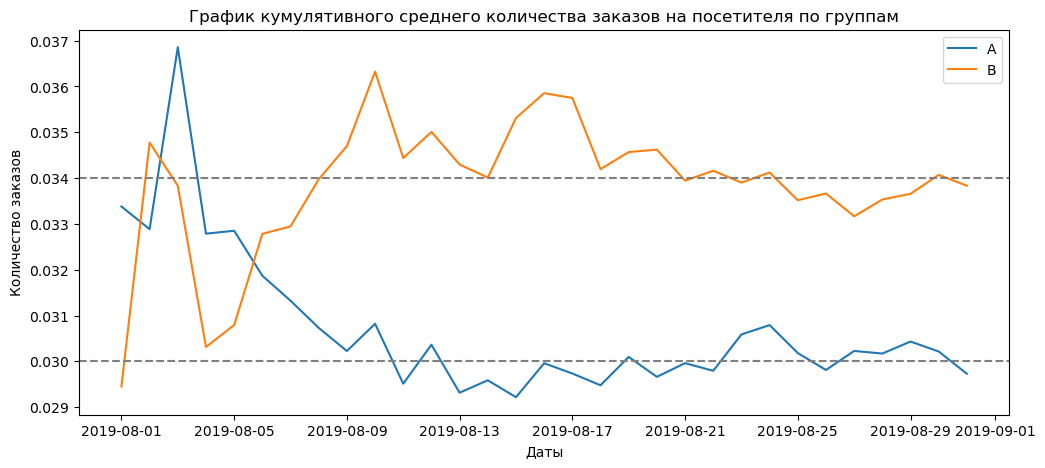

In [34]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


plt.figure(figsize=(12, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Даты')
plt.ylabel('Количество заказов')
plt.axhline(y=0.034, color='gray', linestyle='--')
plt.axhline(y=0.030, color='gray', linestyle='--')
plt.legend();

В начале теста группа А имела большую разницу в количестве заказов, которая далее снизилась и продолжила колебаться в районе 0.030.
Количество заказов группы В колебалось в начале и имело скачки в начале и середине августа, но начало выравниваться к концу теста в районе 0.034, что несколько больше показателей группы А.

#### Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. <a id="5"></a>

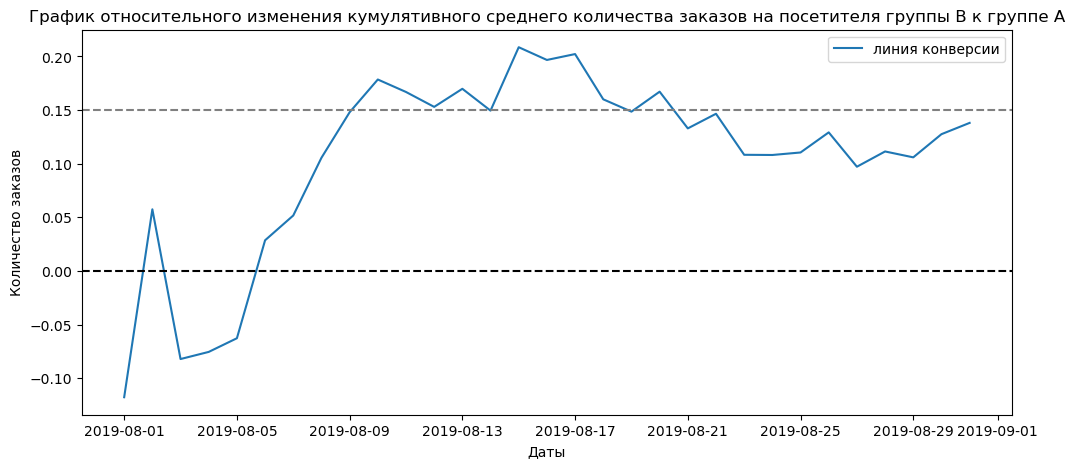

In [35]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']\
         /mergedCumulativeConversions['conversionA']-1,\
         label='линия конверсии')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='gray', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Даты')
plt.ylabel('Количество заказов')
plt.legend();


Группа В почти с самого начала лидирует по количеству заказов, прирост конверсии больше на 15% относительно второй группы.

#### Построить точечный график количества заказов по пользователям.<a id="6"></a>

Подсчитаем количество заказов  на пользователя, и построим точечный график распределения заказов.

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


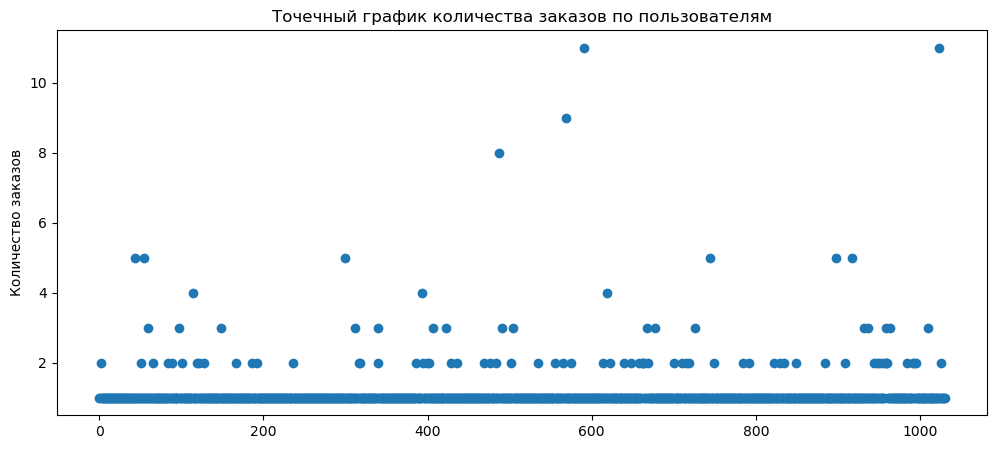

In [36]:
#Подсчитаем количество заказов по пользователям
ordersByUsers = (orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'}))
ordersByUsers.columns = ['visitorId', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

#построим график
plt.figure(figsize=(12, 5))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('')
plt.ylabel('Количество заказов');

Видно, что есть пара всплесков по количеству заказов в районе 8-11шт, в основном же пользователи делают 1-2 заказа, в более редких случаях - 3-4.

#### Посчитать 95-й и 99-й перцентили количества заказов на пользователя.<a id="7"></a>

In [37]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


Не более 5% делали больше 2 заказов и не более 1% - больше 4. Примем за аномальных пользователей тех, кто совершил 4 заказа и более.

#### Построить точечный график стоимостей заказов. <a id="8"></a>

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

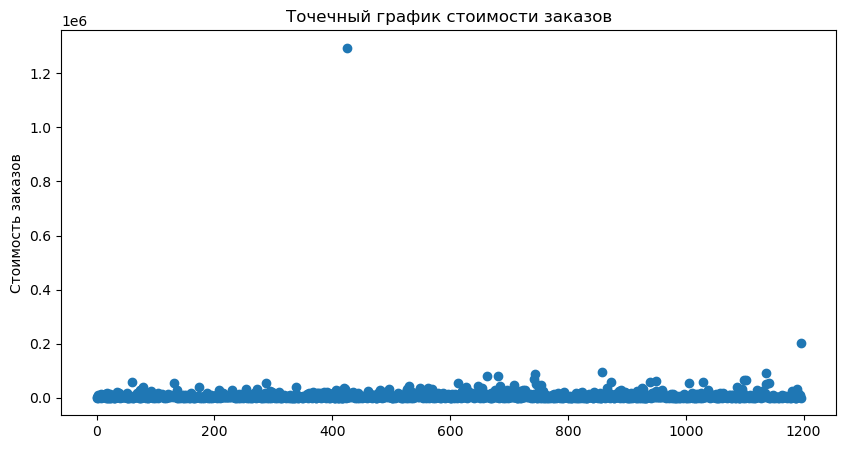

In [38]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимости заказов')
plt.xlabel('')
plt.ylabel('Стоимость заказов');

orders['revenue'].describe()

На графике есть выбросы в районе 200 000 и 1,2млн

#### Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.<a id="9"></a>

In [39]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


Не более чем 5% заказов дороже 18 168 тысяч, и не более 1% дороже 58 233. Примем за аномальных пользователей тех, кто совершил покупку более 28 000.

#### Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. <a id="10"></a>

*Нулевая гипотеза:* различий в среднем количестве заказов между группами нет.

*Альтернативная гипотеза:* различия в среднем количестве заказов между группами есть.

Зададим значение alpha 0.05, а выборку будем проверять критерием Манна-Уитни.

In [40]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1,)

visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersACummulative.columns = ['date',
                              'ordersCummulativeA',
                              'revenueCummulativeA',]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),axis=1,
).sort_values(by=['date'])

ordersBCummulative.columns = ['date',
                              'ordersCummulativeB',
                              'revenueCummulativeB',]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [41]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))

ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],
        pd.Series(0, index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
            name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
        pd.Series(0,index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
            name='orders')],axis=0)

print("p-value: {0:.3f}"
      .format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Изменение среднего конверсии группы B к группе A: {0:.3f}"
      .format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Изменение среднего конверсии группы B к группе A: 0.138


Вывод: По «сырым» данным различий в среднем числе заказов групп A и B нет. 
p-value = 0.017 больше 0.05, начит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, не отвергаем. 
Однако относительная конверсия группы B равна 13.8%

Далее выполним проверку гипотез:

In [42]:
# Выполним проверку гипотезы
alpha = 0.05 # критический уровень статистической значимости
results = stats.mannwhitneyu(sampleA, sampleB)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, различия в среднем количестве заказов между группами есть")
else:
    print("Не получилось отвергнуть нулевую гипотезу, различий в среднем количестве заказов между группами нет")

p-значение: 0.016792355056752608
Отвергаем нулевую гипотезу, различия в среднем количестве заказов между группами есть


#### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.<a id="11"></a>

Теперь проверим статистическую значимость различий в среднем чеке между группами А и В. 

*Нулевая гипотеза*: различий в среднем чеке между группами нет. 

*Альтернативная гипотеза*: различия в среднем чеке между группами есть. 

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.

In [43]:
print('p-value: {0:.3f}'
      .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print('Изменение среднего чека в группе B к группе A: {0:.3f}'
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.729
Изменение среднего чека в группе B к группе A: 0.259


p-value больше 0,05, значит, статистически значимых отличий между группами нет. Также относительное различие среднего чека между группами составляет почти 25,9%

In [44]:
# Выполним проверку гипотезы
alpha = 0.05 # критический уровень статистической значимости
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, различия в среднем чеке между группами есть")
else:
    print("Не получилось отвергнуть нулевую гипотезу, различий в среднем чеке между группами нет.")

p-значение: 0.7292909855432458
Не получилось отвергнуть нулевую гипотезу, различий в среднем чеке между группами нет.


#### Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. <a id="12"></a>

 Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию.

In [45]:
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
    ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],],
    axis=0,)

usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())

*Нулевая гипотеза:* различий в среднем количестве заказов между группами нет.

*Альтернативная гипотеза:* различия в среднем количестве заказов между группами есть.

Посчитаем статистическую значимость различия среднего количества заказов после удаления аномальных пользователей.

In [46]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(0,index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
            name='orders')],axis=0)

sampleBFiltered = pd.concat(
    [ ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],pd.Series(0,index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
            name='orders')],axis=0,) 

print('p-value: {0:.3f}'
      .format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print('Изменение среднего конверсии группы B к группе A: {0:.3f}'
      .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.018
Изменение среднего конверсии группы B к группе A: 0.148


Как и до очищения данных, p-value меньше 0.05.
Конверсия среднего количества заказов составляет 14,8%

In [47]:
# Выполним проверку гипотезы
alpha = 0.05
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, различия в среднем количестве заказов между группами есть")
else:
    print("Не получилось отвергнуть нулевую гипотезу, различий в среднем количестве заказов между группами нет")

p-значение: 0.017942888591552505
Отвергаем нулевую гипотезу, различия в среднем количестве заказов между группами есть


#### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.<a id="13"></a>

*Нулевая гипотеза*: различий в среднем чеке между группами нет. 

*Альтернативная гипотеза*: различия в среднем чеке между группами есть. 

In [48]:
print('p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
            orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'])[1]))

print('Изменение среднего чека в группе B к группе A: {0:.3f}'.format(orders[
            np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

p-value: 0.977
Изменение среднего чека в группе B к группе A: -0.017


После очищения данных p-value увеличилось с 0.729 до 0.977, а различие в среднем чеке снизизилось на 24,2 процентных пункта.

In [49]:
# Выполним проверку гипотезы
alpha = 0.05
results = stats.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], 
    orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, различия в среднем чеке между группами есть")
else:
    print("Не получилось отвергнуть нулевую гипотезу, различий в среднем чеке между группами нет")

p-значение: 0.9765292921254219
Не получилось отвергнуть нулевую гипотезу, различий в среднем чеке между группами нет


###  Принятие решений по результатам теста. Выводы.<a id="end"></a>
**Варианты решений:** 
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

* RICE в отличие от ICE, также включает параметр reach, что влияет на конечный результат, поэтому рекомендуется считать гипотезы 2 и 7  и использование метода RICE наиболее приоритетными.
* Кумулятивная выручка группы В выше выручки группы А.
* Сумма среднего чека группы В в целом превышает показатели группы А.
* В основном же пользователи делают 1-2 заказа, в более редких случаях - 3-4 и более.
* Не более чем 5% заказов дороже 18 168 тысяч, и не более 1% дороже 58 233.
* Были обнаружены повторяющиеся пользователи в обеих группах, из-за чего встает вопрос о необходимости более тщательного отбора и распределения пользователей.

Тест можно остановить, признать его успешным, и зафиксировать победу группы В, 

- так как она вышла вперед по количеству заказов, хотя по среднему чеку различий с группой А нет.
- также график различия конверсии между группами сообщает, что результаты группы B в общем лучше группы A.